In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import json
import numpy as np
import warnings
import os
from sklearn.metrics import roc_curve, roc_auc_score
from math import ceil

pd.set_option('display.max_colwidth', None)
tqdm.pandas()
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
def plot_histogram(target_scores, pred_scores):
    nrows = ceil((len(target_scores) + 1) / 3)
    height = 12 * nrows / 3
    fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(12, height))
    axs = axs.flatten()
    final_plot = len(target_scores)

    for i, (label, scores) in enumerate(target_scores.items()):
        axs[i].hist(scores, bins=50, alpha=0.5, color='r', range=(0, 1), label="Targets")
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Histogram for "{label}"')
        axs[i].set_yscale('log')
    
    for i, (label, scores) in enumerate(pred_scores.items()):
        axs[i].hist(scores, bins=50, alpha=0.5, range=(0, 1), label="Predictions")
        axs[i].legend()

    all_target_scores = [value for values in target_scores.values() for value in values]
    all_pred_scores = [value for values in pred_scores.values() for value in values]
    axs[final_plot].hist(all_target_scores, bins=50, alpha=0.5, color='r', range=(0, 1), label="Targets")
    axs[final_plot].hist(all_pred_scores, bins=50, alpha=0.5, range=(0, 1), label="Predictions")
    axs[final_plot].legend()
    axs[final_plot].set_xlabel('Value')
    axs[final_plot].set_ylabel('Frequency')
    axs[final_plot].set_title("Histogram for All Prompts")
    axs[final_plot].set_yscale('log')

    plt.tight_layout()
    plt.show()

In [8]:
labels = ['toxicity','severe_toxicity','obscene','threat','insult','identity_attack']

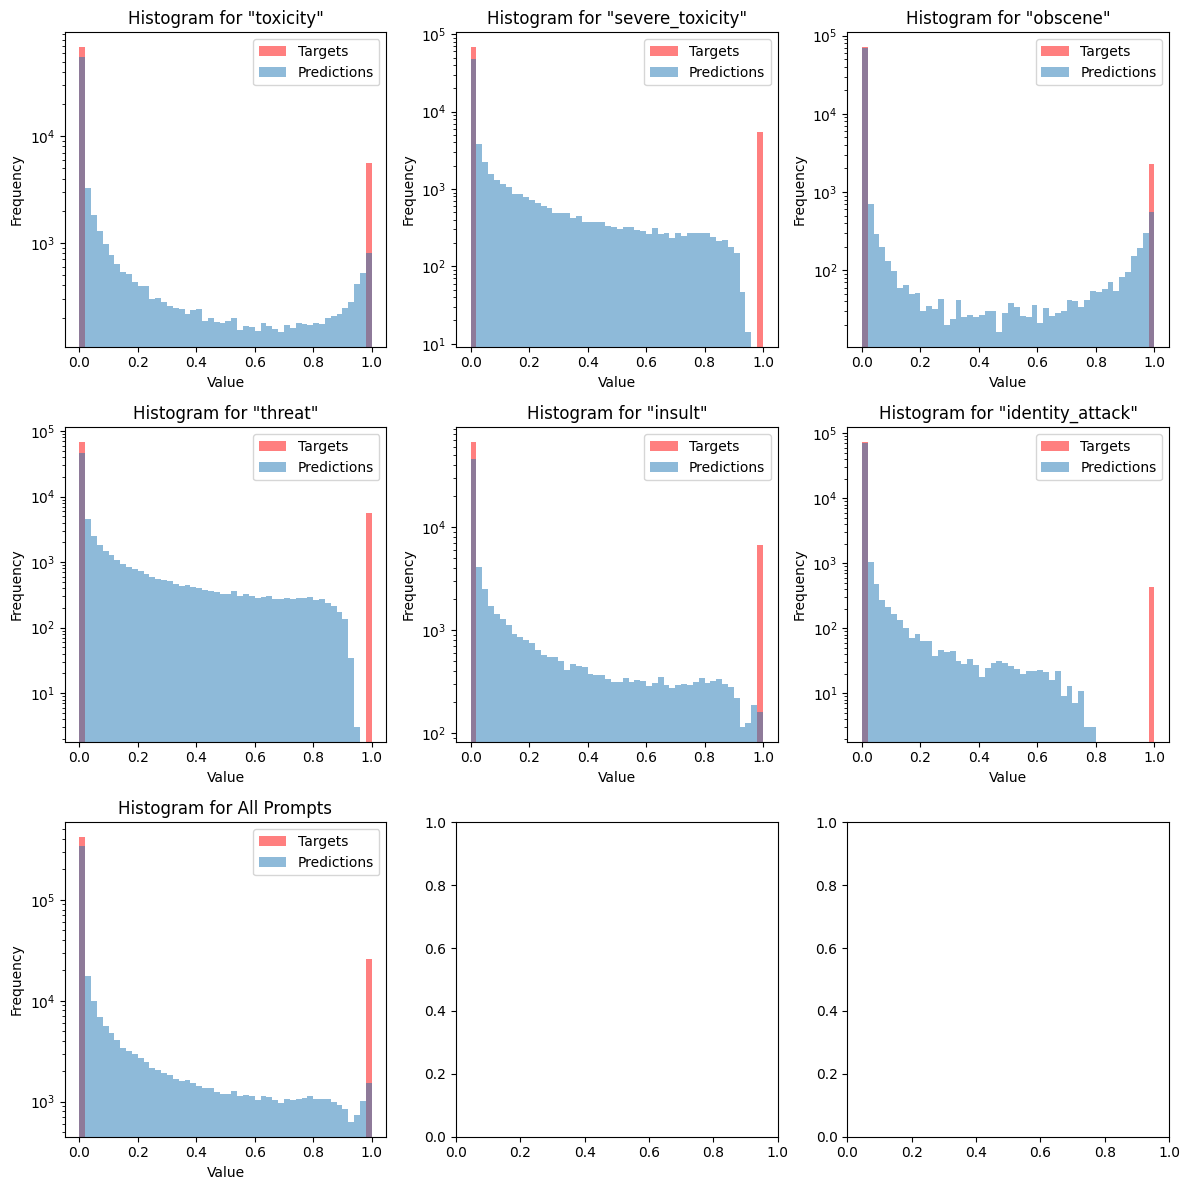

In [4]:
with open('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-War-Only/lightning_logs/version_0/checkpoints/converted/epoch=0-step=9946.test_results.json') as f:
    results = json.load(f)
model_results = results['BOTH']

targets = {}
predictions = {}
for i, label in enumerate(labels):
    targets[label] = [s['target'][i] for s in model_results['data_points']]
    predictions[label] = [s['prediction'][i] for s in model_results['data_points']]

plot_histogram(targets, predictions)


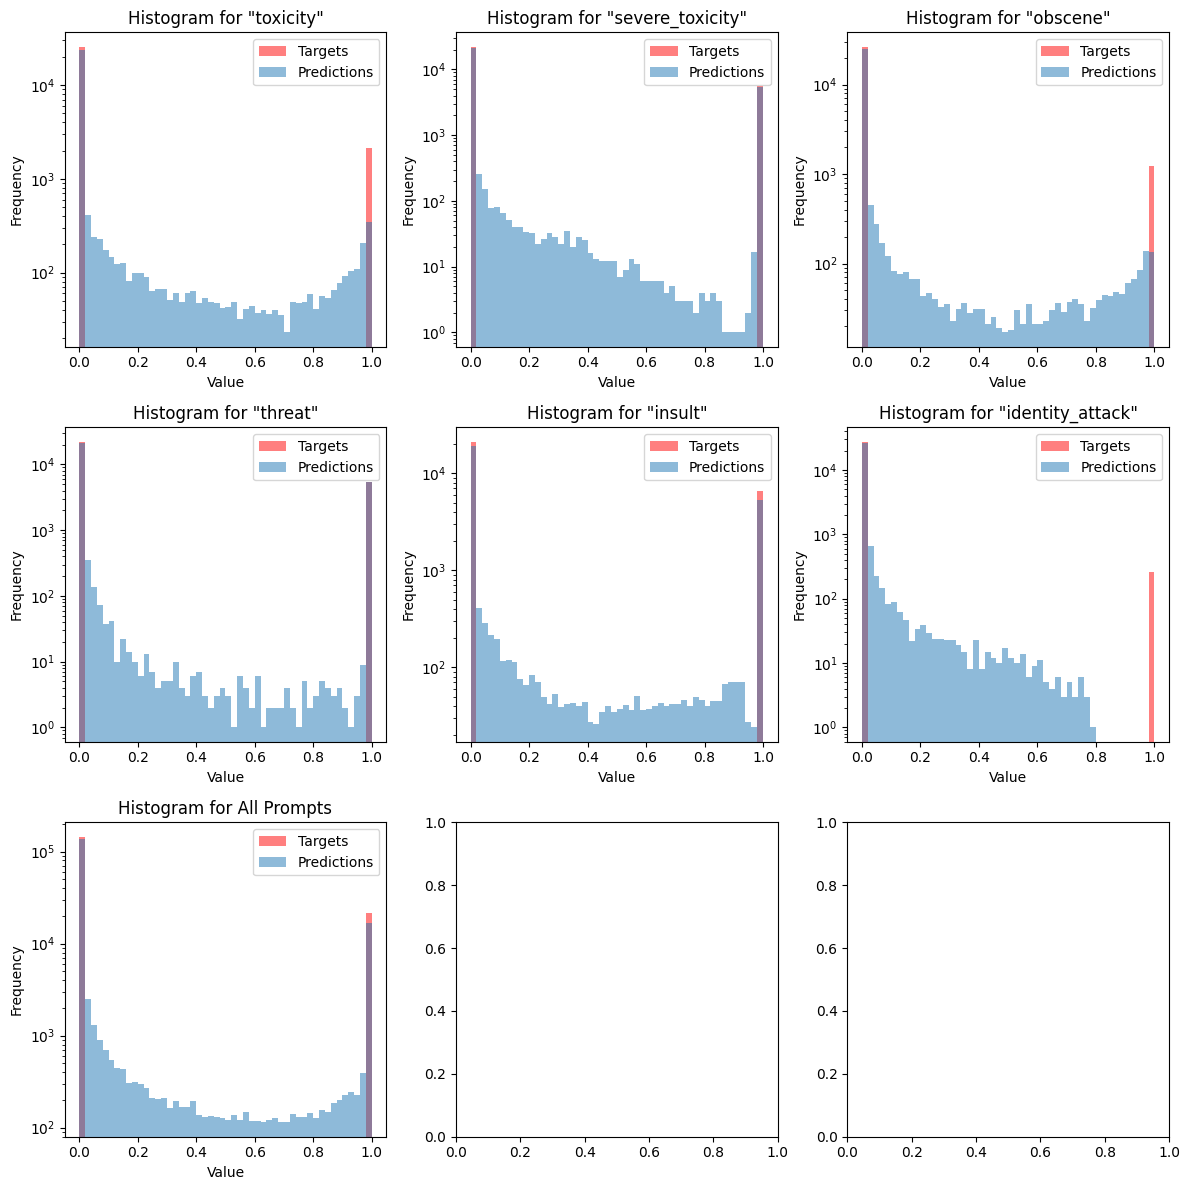

In [5]:
with open('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-War-Secondary/lightning_logs/version_0/checkpoints/converted/epoch=0-step=3701.test_results.json') as f:
    results = json.load(f)
model_results = results['BOTH']

targets = {}
predictions = {}
for i, label in enumerate(labels):
    targets[label] = [s['target'][i] for s in model_results['data_points']]
    predictions[label] = [s['prediction'][i] for s in model_results['data_points']]

plot_histogram(targets, predictions)


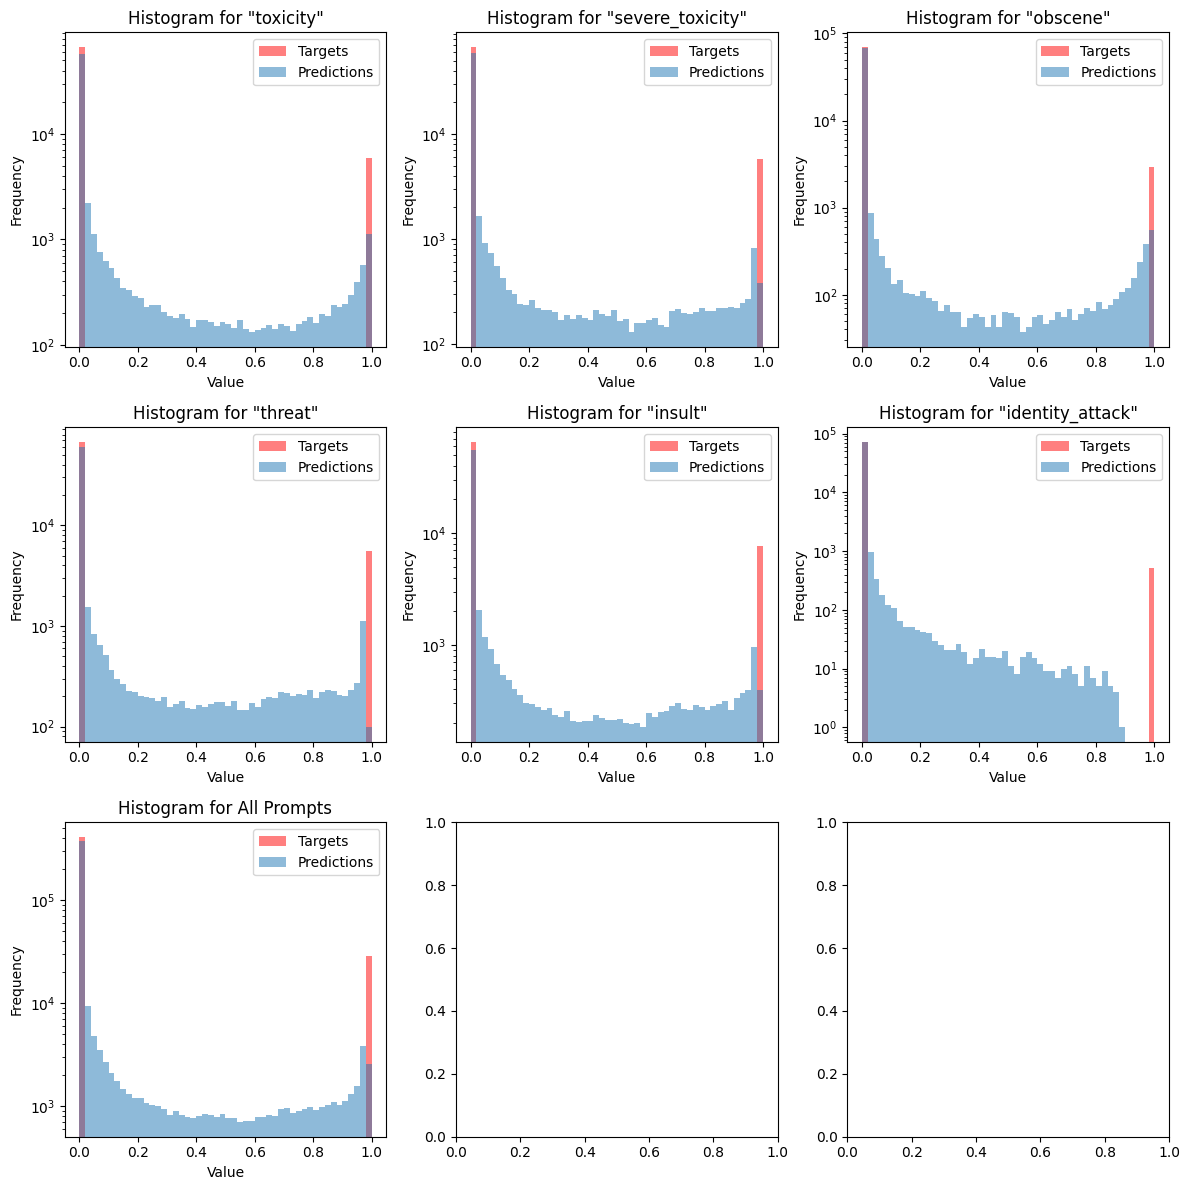

In [6]:
with open('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-War-Combined/lightning_logs/version_0/checkpoints/converted/epoch=2-step=37662.test_results.json') as f:
    results = json.load(f)
model_results = results['BOTH']

targets = {}
predictions = {}
for i, label in enumerate(labels):
    targets[label] = [s['target'][i] for s in model_results['data_points']]
    predictions[label] = [s['prediction'][i] for s in model_results['data_points']]

plot_histogram(targets, predictions)


In [7]:
folder_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-War-Combined/lightning_logs/version_0/checkpoints/converted'
json_data = {}

for filename in os.listdir(folder_path):
    if filename.endswith(".json"):  # Only load JSON files
        epoch = int(filename.split('=')[1].split('-')[0])
        file_path = os.path.join(folder_path, filename)
        with open(file_path) as f:
            data = json.load(f)
            json_data[epoch] = data

json_data = dict(sorted(json_data.items()))


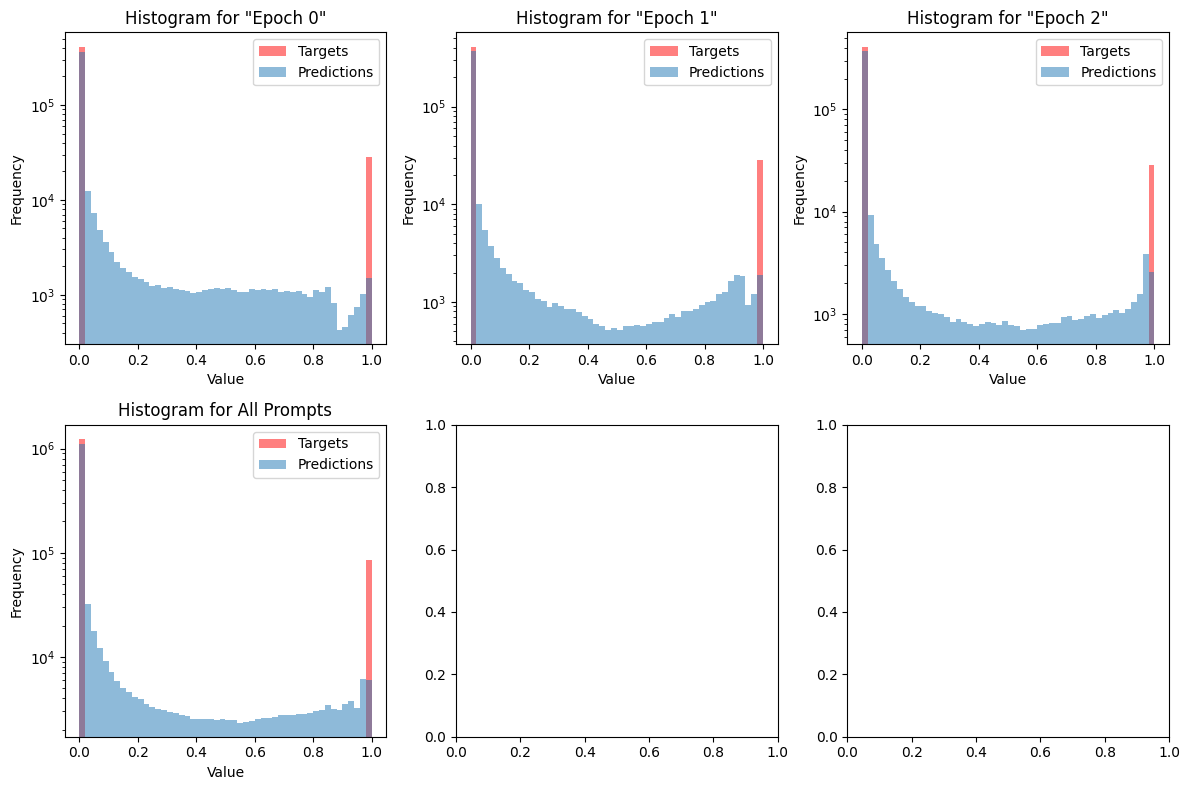

In [8]:
targets_toxicity = {}
predictions_toxicity = {}
for epoch, data in json_data.items():
    nested_values = [s['target'] for s in data['BOTH']['data_points']]
    targets_toxicity[f"Epoch {epoch}"] = [item for sublist in nested_values for item in sublist]
    nested_values = [s['prediction'] for s in data['BOTH']['data_points']]
    predictions_toxicity[f"Epoch {epoch}"] = [item for sublist in nested_values for item in sublist]

plot_histogram(targets_toxicity, predictions_toxicity)


In [9]:
def plot_score_graph(scores):
    f1_scores = [scores[e]['f1'] for e in scores]
    accuracy_scores = [scores[e]['accuracy'] for e in scores]
    recall_scores = [scores[e]['recall'] for e in scores]
    precision_scores = [scores[e]['precision'] for e in scores]

    plt.plot(list(scores.keys()), f1_scores, label='F1')
    plt.plot(list(scores.keys()), accuracy_scores, label='Accuracy')
    plt.plot(list(scores.keys()), recall_scores, label='Recall')
    plt.plot(list(scores.keys()), precision_scores, label='Precision')

    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

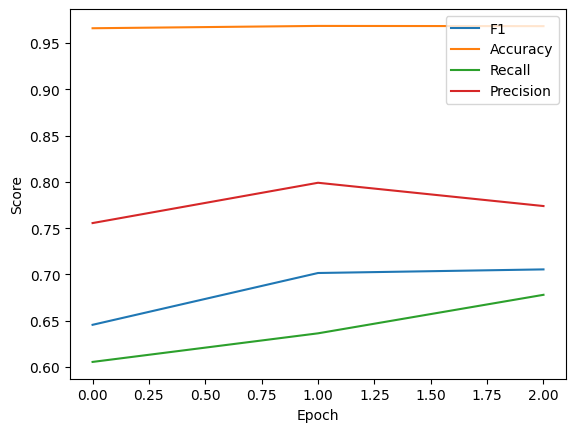

In [10]:
mean_scores = {}
for epoch, data in json_data.items():
    both_data = data['BOTH']
    mean_scores[epoch] = {
        'f1': both_data['mean_f1'],
        'accuracy': both_data['mean_accuracy'],
        'recall': both_data['mean_recall'],
        'precision': both_data['mean_precision']
    }

plot_score_graph(mean_scores)

In [29]:
def data_analysis(df, columns):
    toxicity_counts = df[columns].sum()

    toxicity_counts_df = pd.DataFrame({'count': toxicity_counts})
    toxicity_counts_df.loc['total'] = [len(df)]

    toxicity_counts_df['percent'] = round(toxicity_counts_df['count'] / toxicity_counts_df.loc['total'][0] * 100, 2)

    print(toxicity_counts_df)


In [30]:
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
training_data_primary = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/war_data/training_data/train_comb.csv')
data_analysis(training_data_primary, columns)

                count  percent
toxic           59818     8.43
severe_toxic     2011     0.28
obscene         26383     3.72
threat           1579     0.22
insult          17888     2.52
identity_hate    5156     0.73
total          709996   100.00


In [9]:
with open('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-War-Combined/lightning_logs/version_0/checkpoints/converted/epoch=2-step=37662.test_results.json') as f:
    results = json.load(f)
model_results = results['BOTH']['data_points']

targets = {}
predictions = {}
for i, label in enumerate(labels):
    targets[label] = [s['target'][i] for s in model_results]
    predictions[label] = [s['prediction'][i] for s in model_results]

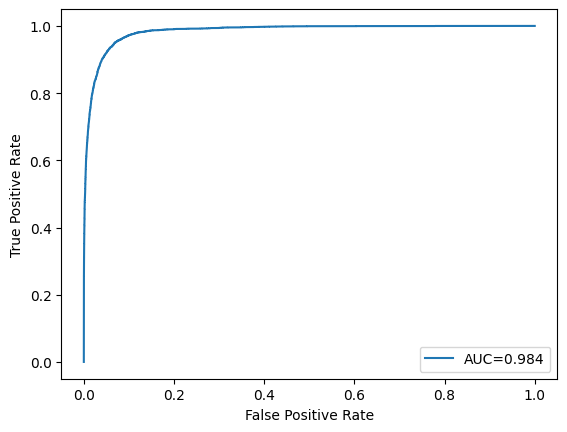

In [6]:
toxicity_pred = [x['prediction'][0] for x in model_results]
toxicity_target = [x['target'][0] for x in model_results]


#create ROC curve
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
def plot_histogram(target_scores, pred_scores):
    nrows = ceil((len(target_scores) + 1) / 3)
    height = 12 * nrows / 3
    fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(12, height))
    axs = axs.flatten()
    final_plot = len(target_scores)

    for i, (label, scores) in enumerate(target_scores.items()):
        fpr, tpr, _ = roc_curve(target_scores,  pred_scores)
        auc = roc_auc_score(target_scores, pred_scores)
        axs[i].plot(fpr,tpr,label="AUC="+str(round(auc, 4)))
        axs[i].set_xlabel('True Positive Rate')
        axs[i].set_ylabel('False Positive Rate')
        axs[i].set_title(f'ROC-AUC for "{label}"')

    all_target_scores = [value for values in target_scores.values() for value in values]
    all_pred_scores = [value for values in pred_scores.values() for value in values]
    fpr, tpr, _ = roc_curve(all_target_scores,  all_pred_scores)
    auc = roc_auc_score(all_target_scores, all_pred_scores)
    axs[final_plot].plot(fpr,tpr,label="AUC="+str(round(auc, 4)))
    axs[final_plot].legend()
    axs[final_plot].set_xlabel('True Positive Rate')
    axs[final_plot].set_ylabel('False Positive Rate')
    axs[final_plot].set_title("ROC-AUC for All Labels")

    plt.tight_layout()
    plt.show()